In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\aatis\Downloads\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


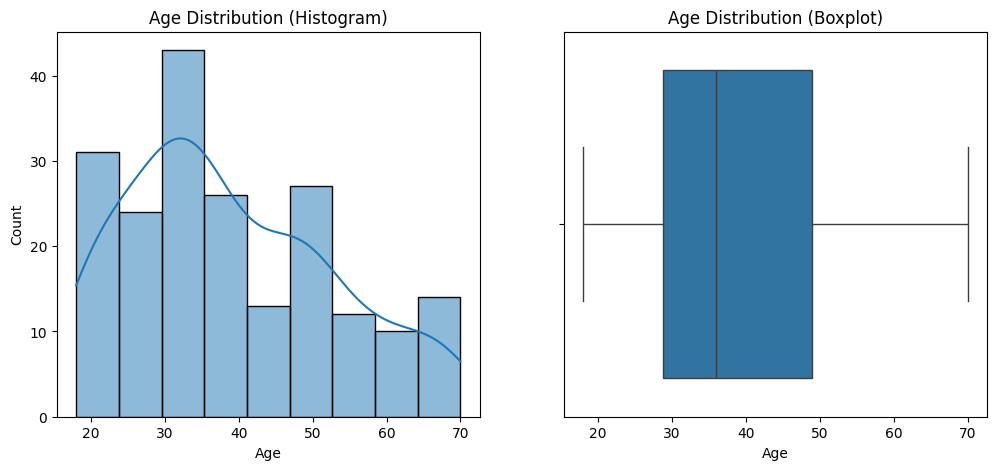

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=df, x='Age', kde=True, ax=ax[0])
ax[0].set_title("Age Distribution (Histogram)")

sns.boxplot(data=df, x='Age', ax=ax[1])
ax[1].set_title("Age Distribution (Boxplot)")

plt.show()

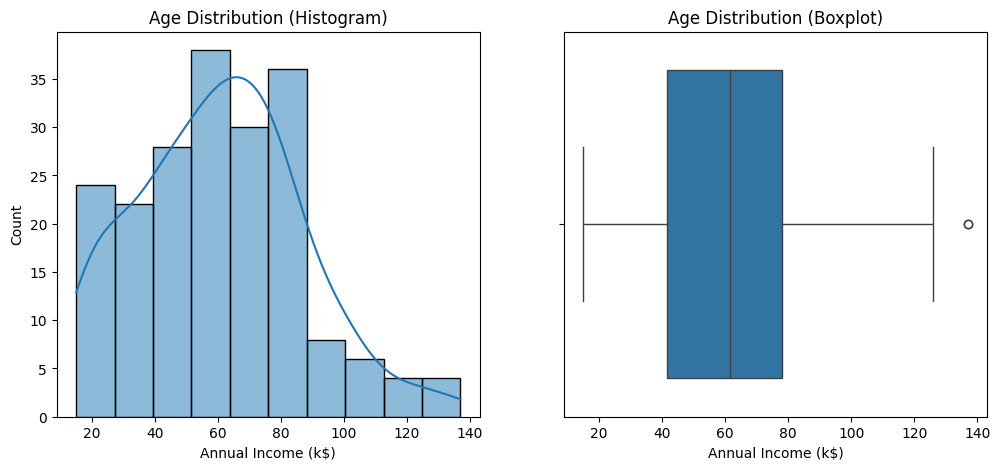

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=df, x='Annual Income (k$)', kde=True, ax=ax[0])
ax[0].set_title("Age Distribution (Histogram)")

sns.boxplot(data=df, x='Annual Income (k$)', ax=ax[1])
ax[1].set_title("Age Distribution (Boxplot)")

plt.show()

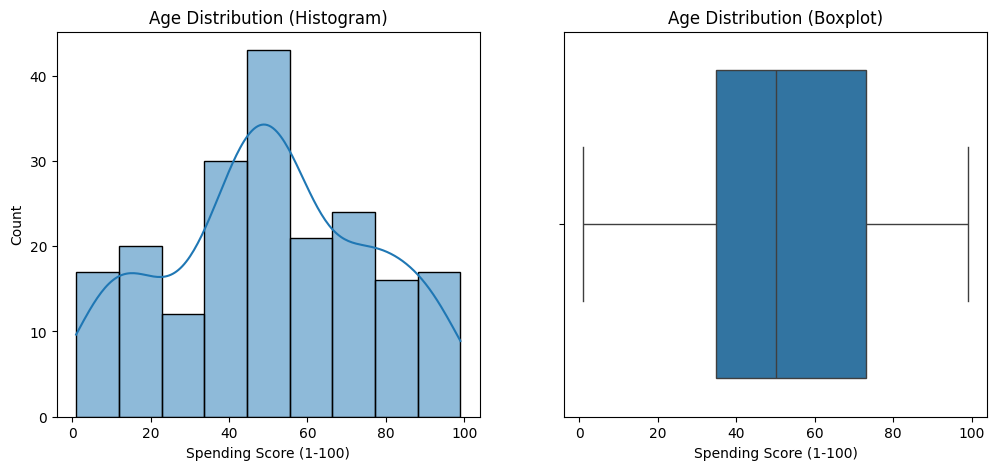

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data=df, x='Spending Score (1-100)', kde=True, ax=ax[0])
ax[0].set_title("Age Distribution (Histogram)")

sns.boxplot(data=df, x='Spending Score (1-100)', ax=ax[1])
ax[1].set_title("Age Distribution (Boxplot)")

plt.show()

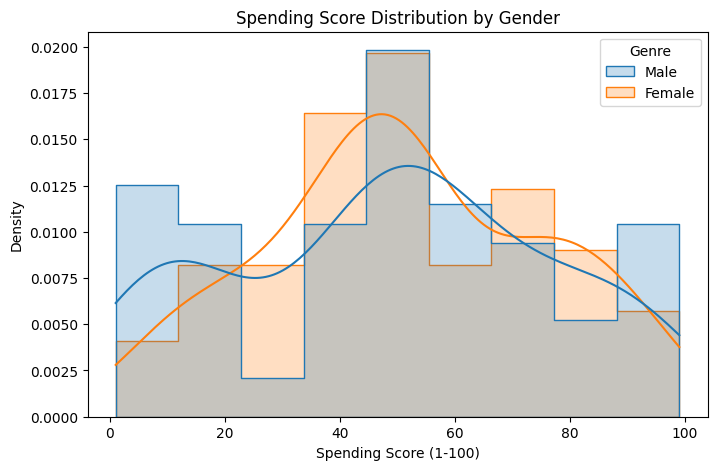

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, hue='Genre', element="step", stat="density", common_norm=False)
plt.title("Spending Score Distribution by Gender")
plt.show()


<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

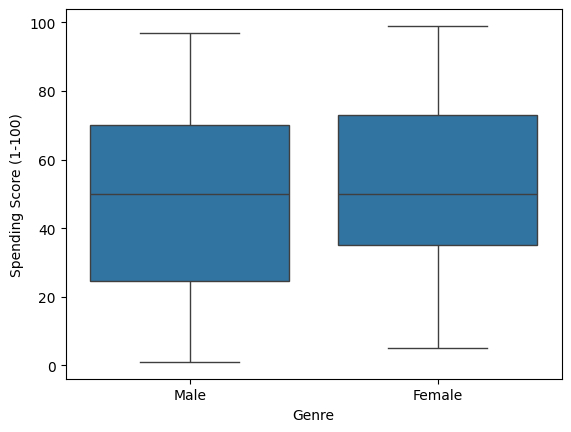

In [20]:
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)')


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

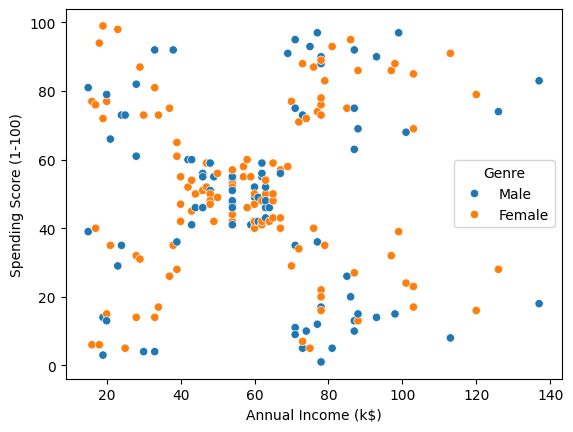

In [16]:
sns.scatterplot(data=df,y='Spending Score (1-100)',x='Annual Income (k$)',hue='Genre')

In [21]:
# step1 not including gender

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Preprocessing
# (your dataset has no missing values, but just in case)
print(X.isnull().sum())

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())


Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use ONLY the two scaled features
X2 = X_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]


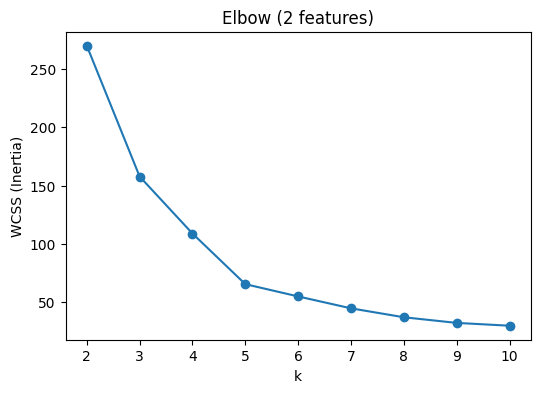

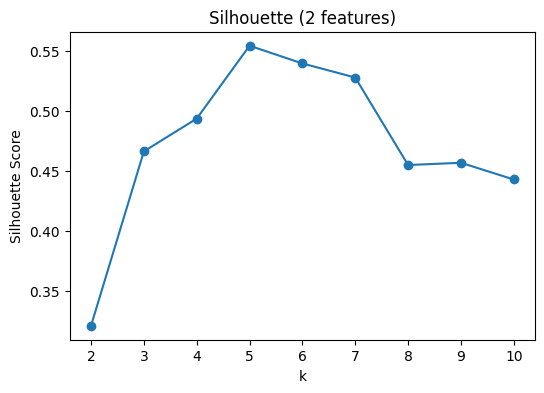

Best k (2 features): 5


In [23]:
inertias, sil_scores = [], []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X2)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X2, labels))

# Elbow
plt.figure(figsize=(6,4))
plt.plot(K, inertias, marker='o')
plt.xlabel('k'); plt.ylabel('WCSS (Inertia)'); plt.title('Elbow (2 features)')
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, marker='o')
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title('Silhouette (2 features)')
plt.show()

k_opt2 = K[int(np.argmax(sil_scores))]  # best by silhouette
print("Best k (2 features):", k_opt2)


In [24]:
km2 = KMeans(n_clusters=k_opt2, n_init=10, random_state=42)
df['Cluster_2f'] = km2.fit_predict(X2)
df['Cluster_2f'] = df['Cluster_2f'].astype('category')


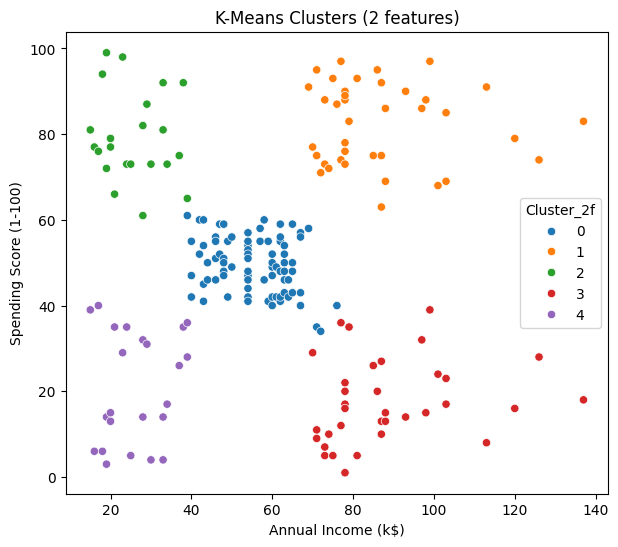

In [25]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster_2f'
)
plt.title('K-Means Clusters (2 features)')
plt.show()


In [26]:
summary_2f = df.groupby('Cluster_2f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
print(summary_2f)


             Age  Annual Income (k$)  Spending Score (1-100)
Cluster_2f                                                  
0           42.7                55.3                    49.5
1           32.7                86.5                    82.1
2           25.3                25.7                    79.4
3           41.1                88.2                    17.1
4           45.2                26.3                    20.9


C:\Users\aatis\AppData\Local\Temp\ipykernel_21860\3224114198.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_2f = df.groupby('Cluster_2f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)


In [27]:
X3 = X_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


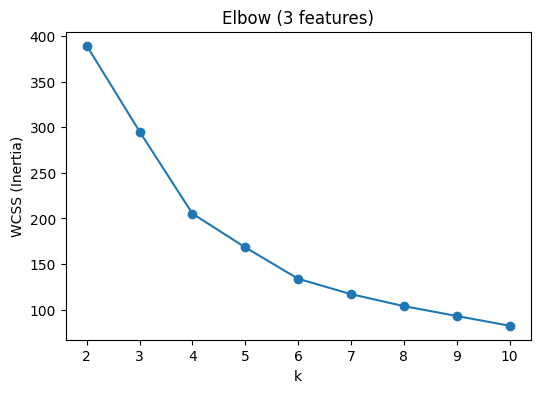

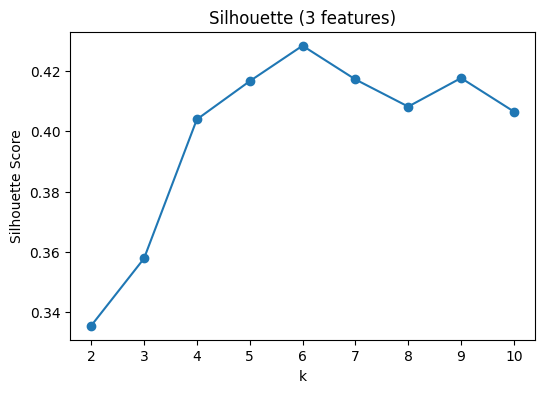

Best k (3 features): 6


In [28]:
inertias3, sil_scores3 = [], []
K3 = range(2, 11)

for k in K3:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X3)
    inertias3.append(km.inertia_)
    sil_scores3.append(silhouette_score(X3, labels))

# Elbow
plt.figure(figsize=(6,4))
plt.plot(K3, inertias3, marker='o')
plt.xlabel('k'); plt.ylabel('WCSS (Inertia)'); plt.title('Elbow (3 features)')
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K3, sil_scores3, marker='o')
plt.xlabel('k'); plt.ylabel('Silhouette Score'); plt.title('Silhouette (3 features)')
plt.show()

k_opt3 = K3[int(np.argmax(sil_scores3))]
print("Best k (3 features):", k_opt3)


In [29]:
km3 = KMeans(n_clusters=k_opt3, n_init=10, random_state=42)
df['Cluster_3f'] = km3.fit_predict(X3)
df['Cluster_3f'] = df['Cluster_3f'].astype('category')


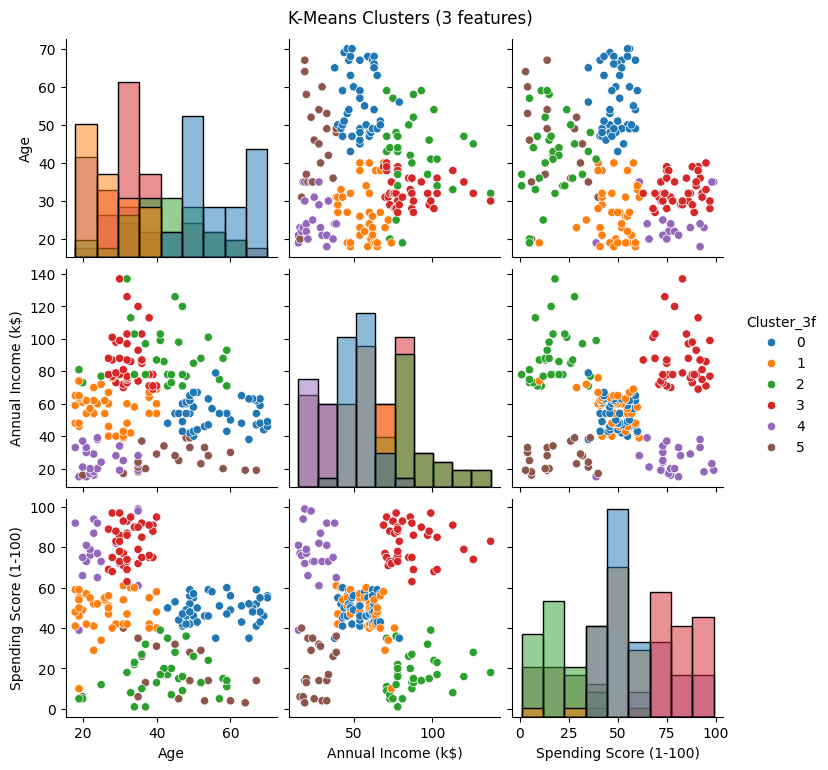

             Age  Annual Income (k$)  Spending Score (1-100)
Cluster_3f                                                  
0           56.3                54.3                    49.1
1           26.8                57.1                    48.1
2           41.9                88.9                    17.0
3           32.7                86.5                    82.1
4           25.0                25.3                    77.6
5           45.5                26.3                    19.4


C:\Users\aatis\AppData\Local\Temp\ipykernel_21860\2624828576.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_3f = df.groupby('Cluster_3f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)


In [30]:
# Pairwise scatter by cluster to see separations
sns.pairplot(
    df[['Age','Annual Income (k$)','Spending Score (1-100)','Cluster_3f']],
    hue='Cluster_3f', diag_kind='hist'
)
plt.suptitle('K-Means Clusters (3 features)', y=1.02)
plt.show()

# Business summary of clusters
summary_3f = df.groupby('Cluster_3f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
print(summary_3f)


In [31]:
ct = pd.crosstab(df['Cluster_3f'], df['Genre'], normalize='index').round(2)
print(ct)


Genre       Female  Male
Cluster_3f              
0             0.58  0.42
1             0.64  0.36
2             0.42  0.58
3             0.54  0.46
4             0.57  0.43
5             0.62  0.38


In [35]:
genre_encoded = pd.get_dummies(df['Genre'], drop_first=True)  # Female=1, Male=0
X4 = np.concatenate([X_scaled.values, genre_encoded.values], axis=1)



In [36]:
# KMeans again
km4 = KMeans(n_clusters=k_opt3, n_init=10, random_state=42)
labels4 = km4.fit_predict(X4)

df['Cluster_4f'] = labels4

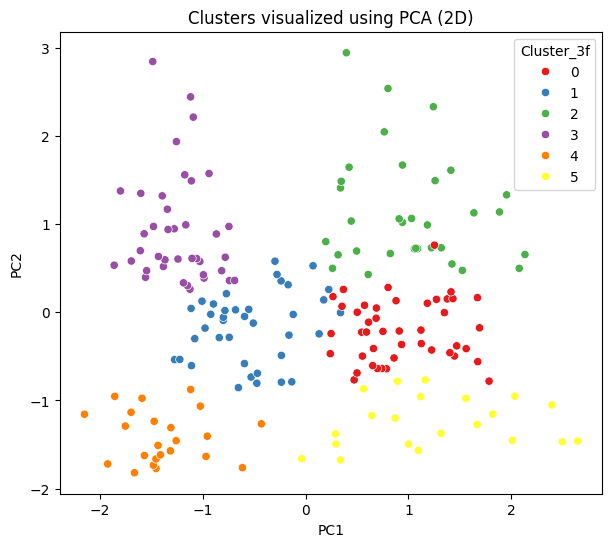

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)   # use 3 features (Age, Income, Spending)

df['PC1'], df['PC2'] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster_3f', palette='Set1')
plt.title("Clusters visualized using PCA (2D)")
plt.show()


In [38]:
summary = df.groupby('Cluster_3f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
print(summary)


             Age  Annual Income (k$)  Spending Score (1-100)
Cluster_3f                                                  
0           56.3                54.3                    49.1
1           26.8                57.1                    48.1
2           41.9                88.9                    17.0
3           32.7                86.5                    82.1
4           25.0                25.3                    77.6
5           45.5                26.3                    19.4


C:\Users\aatis\AppData\Local\Temp\ipykernel_21860\804056284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Cluster_3f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)


In [40]:
df['Cluster_4f'].value_counts()


Cluster_4f
0    45
1    39
5    38
3    34
4    23
2    21
Name: count, dtype: int64

In [41]:
df.groupby('Cluster_4f')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)


,Age,Annual Income (k$),Spending Score (1-100)
Cluster_4f,,,
0,56.3,54.3,49.1
1,32.7,86.5,82.1
2,45.5,26.3,19.4
3,41.3,88.5,16.8
4,25.0,25.3,77.6
5,27.0,56.7,49.1


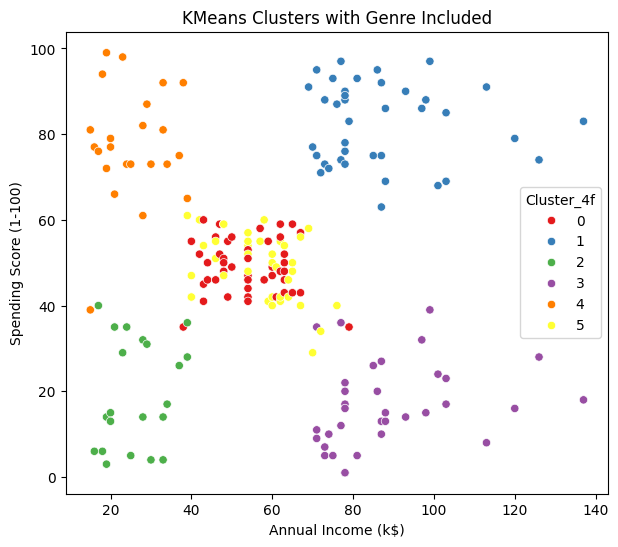

In [39]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster_4f', 
    palette="Set1"
)
plt.title("KMeans Clusters with Genre Included")
plt.show()


| Cluster | Age (avg) | Annual Income (avg, k\$) | Spending Score (avg) | Segment Type                                                    |
| ------- | --------- | ------------------------ | -------------------- | --------------------------------------------------------------- |
| **0**   | 56.3      | 54.3                     | 49.1                 | Older, middle income, moderate spenders                         |
| **1**   | 32.7      | 86.5                     | 82.1                 | Young, high income, **high spenders (premium customers)**       |
| **2**   | 45.5      | 26.3                     | 19.4                 | Middle-aged, low income, **low spenders**                       |
| **3**   | 41.3      | 88.5                     | 16.8                 | Middle-aged, high income, **low spenders (conservative group)** |
| **4**   | 25.0      | 25.3                     | 77.6                 | Young, low income, **high spenders (budget-friendly shoppers)** |
| **5**   | 27.0      | 56.7                     | 49.1                 | Young, middle income, moderate spenders                         |


Business Insights

Cluster 1 (Young, Rich, High Spending) → 🎯 Most valuable. Focus on loyalty programs, exclusive deals, luxury products.

Cluster 3 (High Income, Low Spending) → 🏦 High potential but underperforming. Could be converted with tailored offers & marketing.

Cluster 4 (Young, Low Income, High Spending) → 💳 Strong spenders despite low income. Attract with discounts, trendy/affordable options.

Cluster 2 (Low Income, Low Spending) → 💸 Least profitable. Maintain with budget offerings but not a primary focus.

Clusters 0 & 5 (Moderate groups) → Balanced spenders. Useful for cross-selling / upselling.

In [ ]:
Conclusion

Customer segmentation helps in targeted marketing.

Clear identification of high-value groups (Cluster 1 & 4).

Potential to convert underperforming groups (Cluster 3)
